In [84]:
import requests
import pandas as pd
from datetime import datetime

# Add API key from the API registered
api_key = '2eef271014d9412aa0c636d8631da7b8'

# Define the parameters
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'fintech',  # Keyword to search for
    'from': '2025-05-19',  # Start date
    'to': '2025-06-01',    # End date
    'language': 'en',
    'sortBy': 'publishedAt',
    'pageSize': 50,
    'apiKey': api_key
}

# Make the request
response = requests.get(url, params=params)
if response.status_code == 200:
    articles = response.json()['articles']
    # Extracting four column fields
    record = [{
        'publishedAt': article['publishedAt'],
        'Title': article['title'],
        'Author': article['author'], 
        'Url': article['url']
    } for article in articles]
    # Create DataFrame
    news = pd.DataFrame(record)
   # Convert 'publishedAt' to datetime
    news['publishedAt'] = pd.to_datetime(news['publishedAt']) 
# Split into separate date and time columns
    news['Date'] = news['publishedAt'].dt.date
    news['Time'] = news['publishedAt'].dt.time
    # drop column pulishedAt and time
news = news.drop(columns=['publishedAt'])
news = news.drop(columns=['Time'])
 # Convert 'date' to datetime
news['Date'] = pd.to_datetime(news['Date'])
# set date as an index 
news.set_index('Date', inplace=True)
news.head()

,Title,Author,Url
Date,,,
2025-06-01,"Nifty's breakout above 25,150 to pave way for ...",ET Bureau,https://economictimes.indiatimes.com/markets/s...
2025-06-01,US Commerce Head: Tariffs ‘Not Going Away’,PYMNTS,http://www.pymnts.com/politics/2025/us-commerc...
2025-06-01,"The crypto industry’s ‘silent partners’, how T...",Christina Comben,https://cryptoslate.com/the-crypto-industrys-s...
2025-06-01,Fintechs in talks with RBI for easier provisio...,Anshika Kayastha,https://www.livemint.com/industry/banking/fint...
2025-06-01,Two flaws in vBulletin forum software are unde...,Pierluigi Paganini,https://securityaffairs.com/178481/security/tw...


2025-05-30     3
2025-05-31    19
2025-06-01    28
dtype: int64


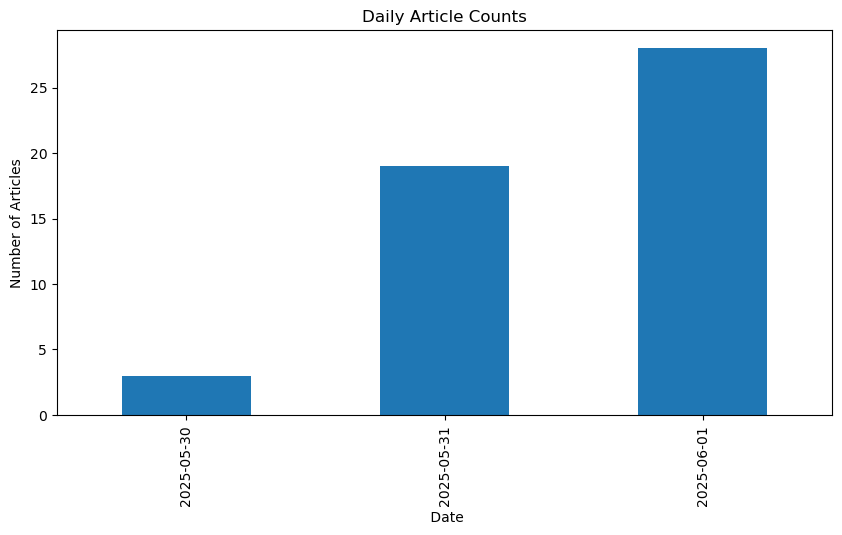

In [68]:
daily_counts = news.resample('D').size() 
#convert index to date so that the time wont be included in the xlabel
daily_counts.index = daily_counts.index.date
print(daily_counts) 
#plot a timeseries graph 
import matplotlib.pyplot as plt
daily_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Daily Article Counts')
plt.xlabel(' Date')
plt.ylabel('Number of Articles')
plt.show()